In [1]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('../data/online_retail.xlsx')

# Preview the data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
# Get dataset shape
print("Shape:", df.shape)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Data types
print("\nData types:")
print(df.dtypes)


Shape: (541909, 8)

Missing values per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Data types:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [3]:
# Drop rows with missing CustomerID or Description
df_clean = df.dropna(subset=['CustomerID', 'Description'])

# Confirm new shape
print("New shape after cleaning:", df_clean.shape)

New shape after cleaning: (406829, 8)


In [4]:
# Remove returns/refunds with negative quantities
df_clean = df_clean[df_clean['Quantity'] > 0]

In [5]:
# Calculate total sale per transaction
df_clean['TotalSales'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [6]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [7]:
# Convert InvoiceDate to datetime (if not already)
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Extract date parts
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['Day'] = df_clean['InvoiceDate'].dt.day
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour


In [8]:
df_clean[['InvoiceDate', 'Year', 'Month', 'Day', 'Hour']].head()


,InvoiceDate,Year,Month,Day,Hour
0,2010-12-01 08:26:00,2010,12,1,8
1,2010-12-01 08:26:00,2010,12,1,8
2,2010-12-01 08:26:00,2010,12,1,8
3,2010-12-01 08:26:00,2010,12,1,8
4,2010-12-01 08:26:00,2010,12,1,8


In [9]:
monthly_sales = df_clean.groupby(['Year', 'Month'])['TotalSales'].sum().reset_index()
monthly_sales


,Year,Month,TotalSales
0,2010,12,572713.890
1,2011,1,569445.040
2,2011,2,447137.350
3,2011,3,595500.760
4,2011,4,469200.361
5,2011,5,678594.560
6,2011,6,661213.690
7,2011,7,600091.011
8,2011,8,645343.900
9,2011,9,952838.382


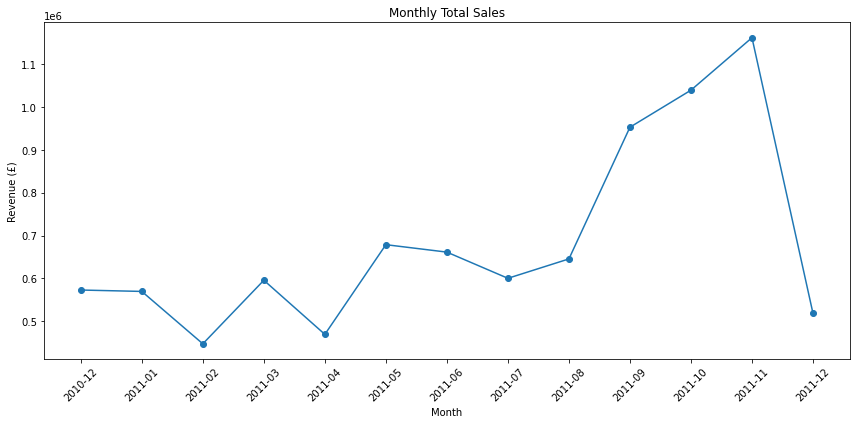

In [10]:
import matplotlib.pyplot as plt

# Combine Year and Month into a label
monthly_sales['Period'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Period'], monthly_sales['TotalSales'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Total Sales")
plt.xlabel("Month")
plt.ylabel("Revenue (£)")
plt.tight_layout()
plt.show()
